In [1]:
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
import pickle

## [[4,2,2]] 

#### Define code

In [2]:
n = 4
k = 2 
d = 2

stabs = ['XXXX','ZZZZ']
H_symp = stabs_to_H_symp(stabs)

## 1-code block embedding

In [3]:
H_symp_embedded = qec_embed_code(H_symp, embedding = 'all_weight_2').embed_mat()
n = H_symp_embedded.shape[1]//2

#### Standard form of code

In [4]:
G, LX, LZ, D = compute_standard_form(H_symp_embedded)

#### Automorphism group generators from MAGMA

In [5]:
#code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp_embedded).run(fileroot='./')
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  24576
Time:  0.02
No of aut gens:  12


#### Circuits of automorphism group generators

In [6]:
auts = code_auts_dict['auts']
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp_embedded,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp_embedded,phys_circ)
    circ = log_act.run()
    circuits.append(circ)
    symp_mats.append(log_act.U_logical_act())

In [7]:
filename = f'./symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

### Logical gate 1

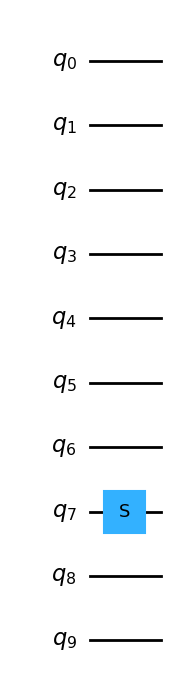

In [8]:
# physical circuit
log_act, phys_circ = circuits[0]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

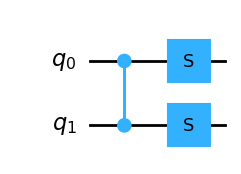

In [9]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 2

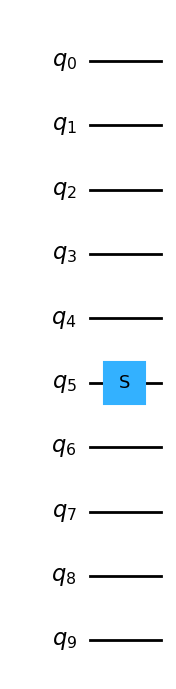

In [10]:
# physical circuit
log_act, phys_circ = circuits[1]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

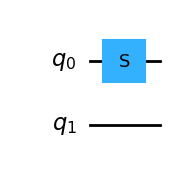

In [11]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 3

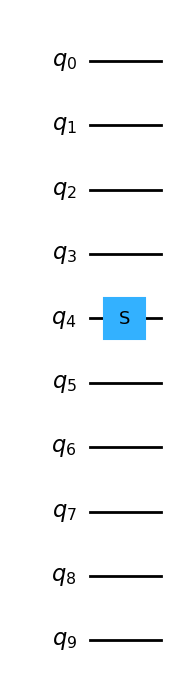

In [12]:
# physical circuit
log_act, phys_circ = circuits[2]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

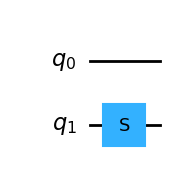

In [13]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 4

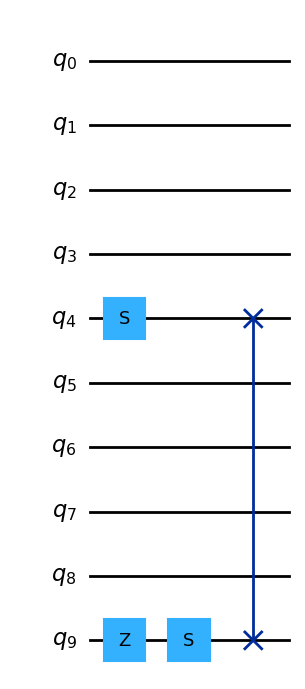

In [14]:
# physical circuit
log_act, phys_circ = circuits[3]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

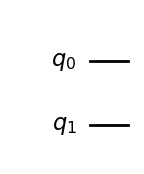

In [15]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 5

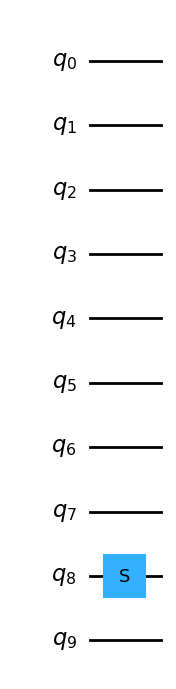

In [16]:
# physical circuit
log_act, phys_circ = circuits[4]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

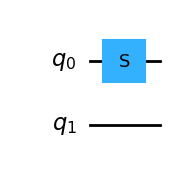

In [17]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 6

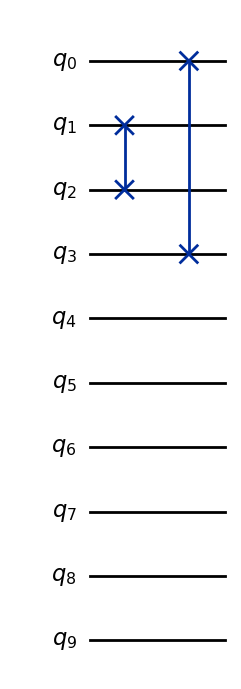

In [18]:
# physical circuit
log_act, phys_circ = circuits[5]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

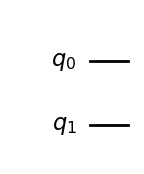

In [19]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 7

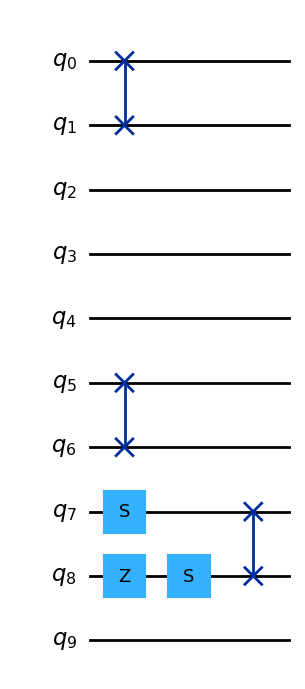

In [20]:
# physical circuit
log_act, phys_circ = circuits[6]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

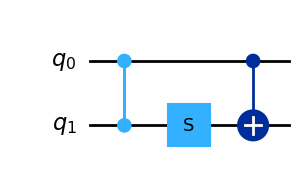

In [21]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 8

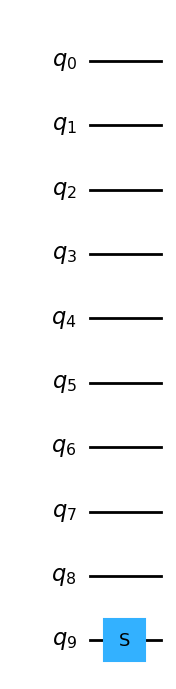

In [22]:
# physical circuit
log_act, phys_circ = circuits[7]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

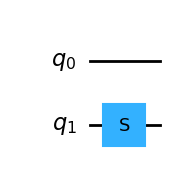

In [23]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 9

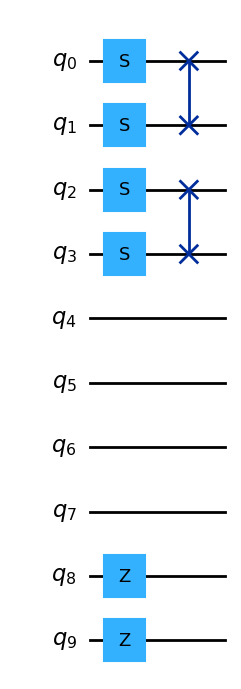

In [24]:
# physical circuit
log_act, phys_circ = circuits[8]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

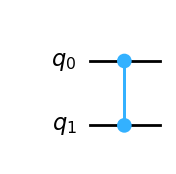

In [25]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 10

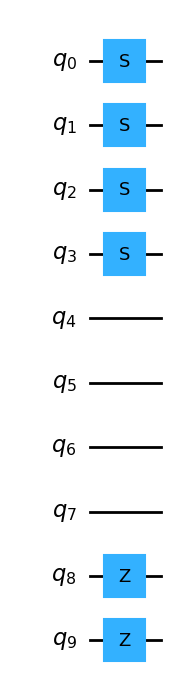

In [26]:
# physical circuit
log_act, phys_circ = circuits[9]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

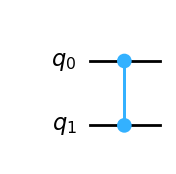

In [27]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

# Logical subgroups

In [28]:
filename = f'./symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    symp_mats = pickle.load(f)

In [29]:
from logical_subgroups import *
gate_group = clifford_subgroups(k,symp_mats) # uses MAGMA
gate_group.return_order()

48

In [30]:
gate_group.return_structure()

'C2*S4'